# Auto-mpg case study

In this notebook, Principal Component Analysis (PCA) is used to reduce the dimensionality of the data.
Additionally, data analysis is performed on the data and usefull insights are provided.

This dataset was taken from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml). The dataset was used in 1983 American Statistical Association Exposition (ASAE).

The dataset has eight vaiables.
- mpg(gallon)
- cyl(number of cylinders)
- disp(engine displacement)
- hp(horsepower)
- wt(weight)
- acc(time taken to reach 60 mph(seconds))
- yr (model year)
- car name


### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

#### Load the file

In [2]:
data = pd.read_csv("auto-mpg.csv")
data[:3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


- Data rows are 398
- Horsepower and car name are of object(non-numeric) type
- Check horsepower column, because it must be of numeric type

### EDA and preprocessing

In [4]:
data['car name'].nunique()

305

Car name column has several unique entries. THerefore, we give it less priority and drop it

In [5]:
data0 = data.copy()
data = data.drop(['car name'], axis=1)

Explore horsepower column and check it's values(whether digits or not)

In [6]:
hp_is_digit = pd.DataFrame(data.horsepower.str.isdigit())

 Get all those rows in which horsepower is non-numerical

In [7]:
data[hp_is_digit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


#### Observation
The horsepower column contains 6 missing values. That's why it's data type 
was non-numeric. We need to fill the values. Before that replace "?" with "NaN"

In [8]:
data = data.replace('?',np.nan)
data[hp_is_digit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In order to fill values, we here select median of the data.
NOTE: one can also choose either mean or mode instead of median

In [9]:
data.horsepower.fillna(data.horsepower.median(),inplace=True)
data['horsepower'] = data['horsepower'].astype('float64')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


Now that entire data is in numeric format, we can get it's description

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


Check distribution of each columns and find outliers

mpg
Skew :  0.46


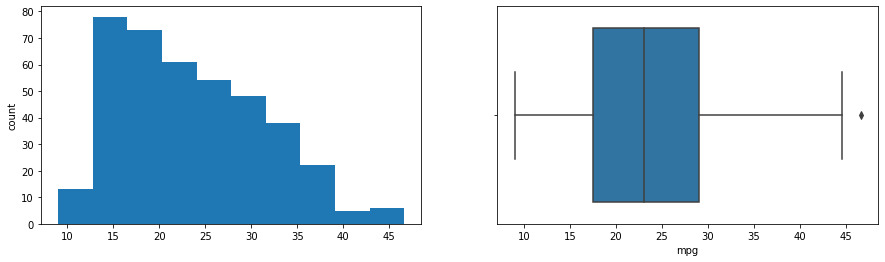

cylinders
Skew :  0.53


<Figure size 432x288 with 0 Axes>

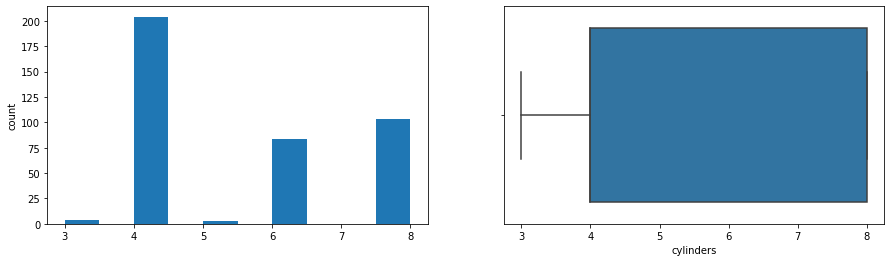

displacement
Skew :  0.72


<Figure size 432x288 with 0 Axes>

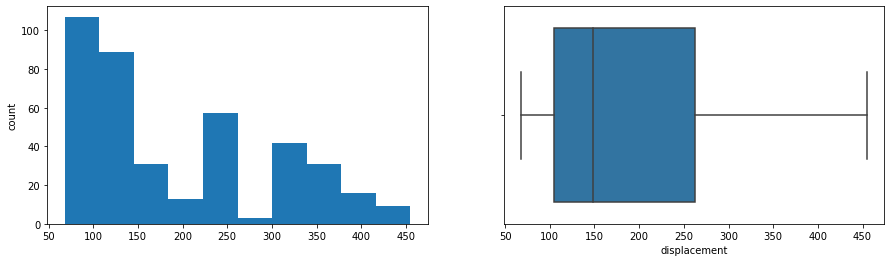

horsepower
Skew :  1.11


<Figure size 432x288 with 0 Axes>

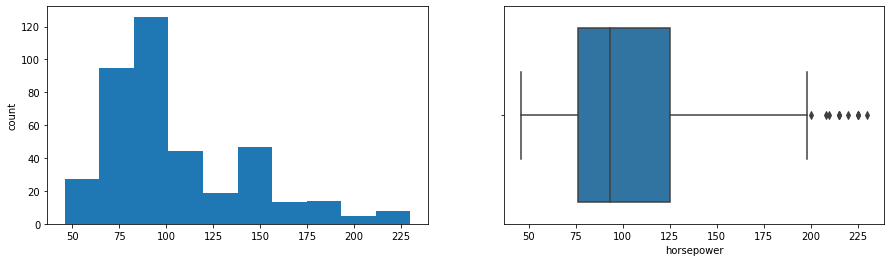

weight
Skew :  0.53


<Figure size 432x288 with 0 Axes>

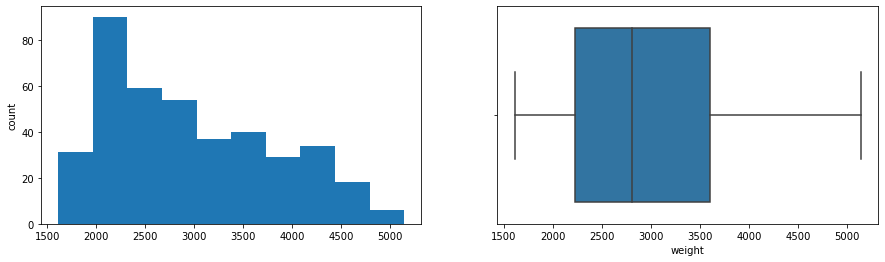

acceleration
Skew :  0.28


<Figure size 432x288 with 0 Axes>

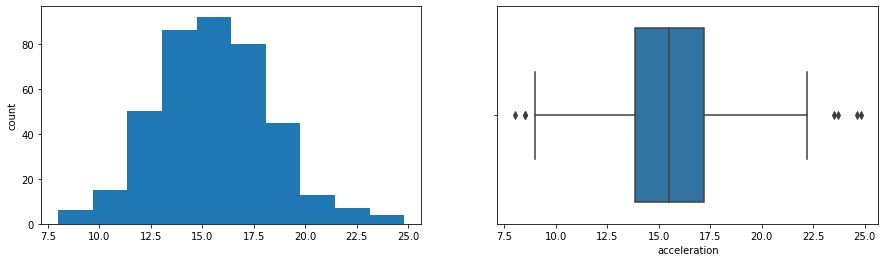

model year
Skew :  0.01


<Figure size 432x288 with 0 Axes>

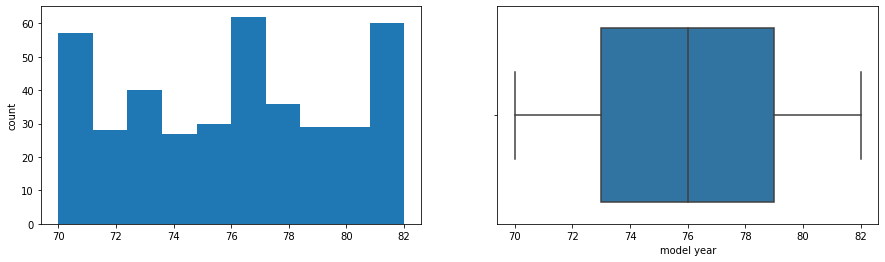

<Figure size 432x288 with 0 Axes>

In [12]:
for c in data.columns:
    print(c)
    print("Skew : ", round(data[c].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[c].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[c])
    plt.show()
    plt.savefig(f'skew_{int(10*round(data[c].skew(),2))}.png')

#### Observations

The Acceleration is normally distributed. While mpg, displacement, weight are right skewed.
Cars with 4 cylinders are most common. Most of the cars are of year 76 and 77.

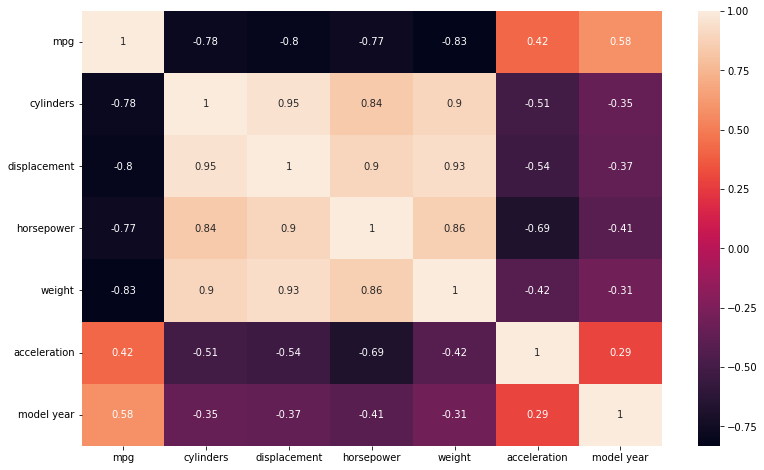

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(), annot=True)
plt.show()
plt.savefig('corr_plot.png')

#### Observations

From data...
- More number of cylinders, more displacement
- weight and mpg are anti-correlated, while weight and displacement are correlated
- horsepower and mpg are anti-correlated while horsepower and weight are correlated
- model year is positively correlated with acceleration and mpg

###### Scaling the data

In [14]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [15]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


### Principal Component Analysis

In [16]:
# Define number of principal components to generate 
n = data_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components=n, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

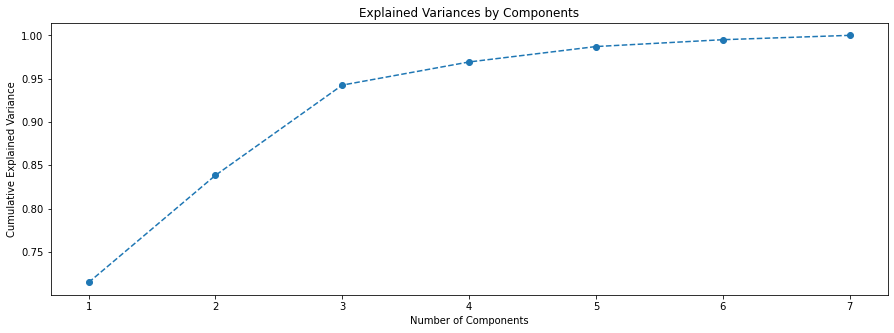

In [19]:
# visualize the explained variance by individual components
plt.figure(figsize = (15,5))
plt.plot(range(1,8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.savefig('var_visualization_by_components.png')

In [20]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  3


#### Observations:

- We can see that out of the 7 original features, we reduced the number of features through principal components to 3, these components explain more than 90% of the original variance.
- So that is about 57% reduction in the dimensionality with a loss of 10% in variance.
- Let us now look at these principal components as a linear combination of original features.

In [21]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


In [22]:
def color_high(val):
    if val <= -0.40: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


#### Observations:

- Each principal component is a linear combination of original features. For example, we can write the equation for PC1 in the following manner:

$$-0.40 mpg + 0.42 cylinders + 0.43 displacement + 0.42 horsepower + 0.41 weight - 0.28 acceleration - 0.23 * model year$$

- The first principal component, PC1, is a measure of mpg, cylinders, displacement, horsepower, and weight. PC1 is associated with high scores of all these variables, except mpg, as these variables have positive weights. PC1 is associated with low values of mpg. This principal component seems to capture attributes that generally define cars with heavy engines with high number of cylinders, displacement, horsepower and weight and a a result of heavy engines such cars would have low mileage.
- The second principal component, PC2, is a measure of model year. PC2 is associated with low values of model year.
- The third principal component, PC3, is a measure of the acceleration.

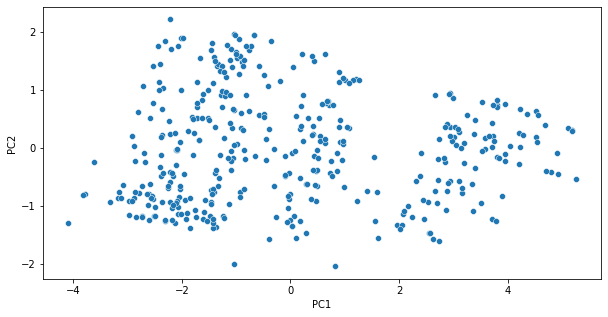

In [23]:
plt.figure(figsize = (10,5))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Text(0, 0.5, 'PC2')

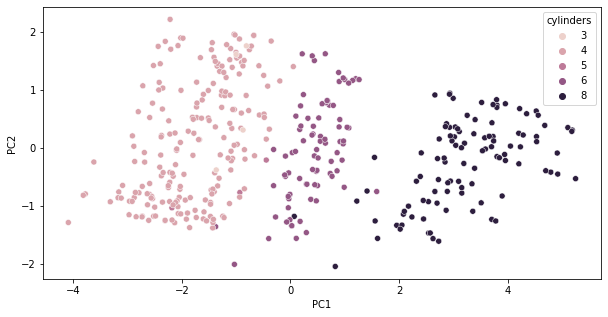

In [24]:
df_concat = pd.concat([data_pca1, data], axis=1)

plt.figure(figsize = (10,5))
sns.scatterplot(x = 0, y=1, data = df_concat, hue='cylinders')
plt.xlabel("PC1")
plt.ylabel("PC2")

#### Observations:

- We can see there are 3 groups:
    1. One with 3, 4, or 5 number of cylinders
    2. One with 6 numbers of cylinders
    3. One with 8 number of cylinders
- However, the distinction between the groups is not strong and there are some overlaps.